# Scraping

In [1]:
import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib

In [2]:
url = "http://books.toscrape.com/"

# Use `requests` to do an HTTP request to fetch data located at that URL
response = requests.get(url)

# Create a `BeautifulSoup` instance with that data
soup = BeautifulSoup(response.content, "html.parser")

In [7]:
books_html = soup.find_all(class_='product_pod')

In [8]:
len(books_html)

20

## Parsing _one_ book

In [18]:
book_title = books_html[0].find('h3').find('a').attrs['title']
book_title

'A Light in the Attic'

In [24]:
book_price = float(books_html[0].find(class_='price_color').string.strip('£'))
book_price

51.77

In [26]:
book_stars_html = books_html[0].find("p", class_="star-rating")
book_stars_html

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [27]:
book_stars_html.attrs['class']

['star-rating', 'Three']

In [28]:
def parse_rating(rating_classes):
    # Look at `rating_classes` and return the correct rating
    # e.g. of an argument for `rating_classes`: [ 'star-rating', 'Three' ]
    if rating_classes[1] == 'One':
        return 1
    elif rating_classes[1] == 'Two':
        return 2
    elif rating_classes[1] == 'Three':
        return 3
    elif rating_classes[1] == 'Four':
        return 4
    elif rating_classes[1] == 'Five':
        return 5
    else:
        return 0

In [30]:
book_rating = parse_rating(books_html[0].find("p", class_="star-rating").attrs['class'])
book_rating

3

## Parsing _all_ books

In [31]:
books_dict = {'Title': [], 'Price': [], 'Rating': []}

for book in books_html:
    books_dict['Title'].append(book.find('h3').find('a').attrs['title'])
    books_dict['Price'].append(float(book.find(class_='price_color').string.strip('£')))
    books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))

In [33]:
len(books_dict['Title'])

20

## Loading data in Pandas

In [34]:
books_df = pd.DataFrame.from_dict(books_dict)
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


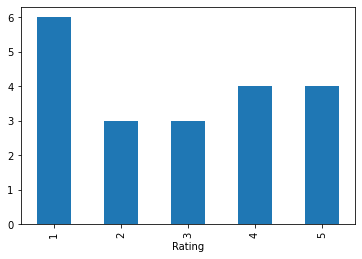

In [36]:
books_df.groupby("Rating").count()["Title"].plot(kind="bar");

In [37]:
from nbresult import ChallengeResult

result = ChallengeResult('books',
    books_dict=books_dict,
    columns=books_df.columns,
    title=str(books_df.loc[0,'Title']),
    price=books_df.loc[0,'Price'],
    rating=books_df.loc[0,'Rating']
)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/matheus/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/matheus/code/matheussposito/data-challenges-869/02-Data-Toolkit/02-Data-Sourcing/02-Scraping
plugins: anyio-3.4.0
collecting ... collected 6 items

tests/test_books.py::TestBooks::test_books_df_columns_name PASSED        [ 16%]
tests/test_books.py::TestBooks::test_books_df_columns_size PASSED        [ 33%]
tests/test_books.py::TestBooks::test_books_dict_id_defined PASSED        [ 50%]
tests/test_books.py::TestBooks::test_first_book_price PASSED             [ 66%]
tests/test_books.py::TestBooks::test_first_book_rating PASSED            [ 83%]
tests/test_books.py::TestBooks::test_first_book_title PASSED             [100%]

============================== 6 passed in 0.49s ===============================


💯 You can commit your code:

git add tests/b

## Going through all the pages of the catalogue

In [38]:
MAX_PAGE = 3
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    print(url)

http://books.toscrape.com/catalogue/page-1.html
http://books.toscrape.com/catalogue/page-2.html
http://books.toscrape.com/catalogue/page-3.html


In [41]:
all_books_dict = {'Title': [], 'Price': [], 'Rating': []}

MAX_PAGE = 30
for page in range(1, MAX_PAGE + 1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    books_html = soup.find_all(class_='product_pod')
    
    for book in books_html:
        all_books_dict['Title'].append(book.find('h3').find('a').attrs['title'])
        all_books_dict['Price'].append(float(book.find(class_='price_color').string.strip('£')))
        all_books_dict['Rating'].append(parse_rating(book.find("p", class_="star-rating").attrs['class']))

In [42]:
len(all_books_dict["Title"])

600

In [43]:
all_books_df = pd.DataFrame.from_dict(all_books_dict)
all_books_df.tail()

,Title,Price,Rating
595,The Grand Design,13.76,3
596,The Firm,45.56,3
597,The Fault in Our Stars,47.22,1
598,The False Prince (The Ascendance Trilogy #1),56.00,5
599,The Expatriates,44.58,2


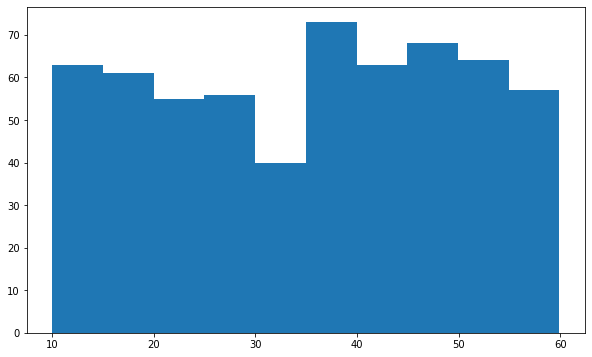

In [49]:
all_books_df["Price"].hist(grid=False, figsize=(10,6));

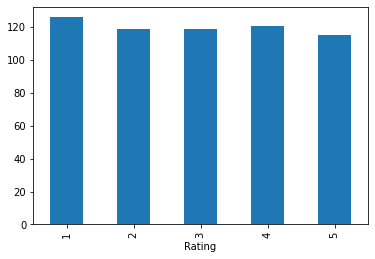

In [50]:
all_books_df.groupby("Rating").count()["Title"].plot(kind="bar");

In [51]:
all_books_df.to_csv("books.csv")